# Youtube Spam Filtering using Logistic Regression and Naiive Bayes Classifiers

In [217]:
import pandas as pd
import numpy as np
from numpy import mean, std
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, mean_squared_error, roc_curve
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, fbeta_score
import math
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Download the YouTube Spam Collection data set from https://archive.ics.
uci.edu/ml/datasets/YouTube+Spam+Collection
.

In [218]:
df = pd.read_csv("Youtube04-Eminem.csv")
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1
...,...,...,...,...,...
443,LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4,Dany PK,NaN,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
444,LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8,SmexyFriedChicken,NaN,Check out my videos guy! :) Hope you guys had ...,1
445,LneaDw26bFuvs-8oWkLpAFa6g3QHpWD8k7sbbMP3Bg8,The Guy That's Done Everything,NaN,3 yrs ago I had a health scare but thankfully ...,1
446,z12hfp2wmyuqztkw504cgblyxtbsxjuzeow0k,Jesse Pinkman,2015-05-06T11:42:44.601000,Rihanna looks so beautiful with red hair ;)﻿,0


train/test set split

In [219]:
Ham = df[df["CLASS"] == 0]
H = len(Ham.index)
Ham

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
5,z133yfmjdur4dvyjr04ceh2osl2fvngrqi4,Darrion Johnson,2015-05-29T01:27:30.360000,Wow this video almost has a billion views! Did...,0
7,z12vxdzzds2kzzrzq04cdjc4ozq2szuyl5o,Damax,2015-05-29T00:41:22.426000,Almost 1 billion﻿,0
9,z132wd4ywmicxj2gn04cdfhilyryjhmjhk00k,JuanPa Rap,2015-05-28T23:23:41.231000,Eminem is idol for very people in España and M...,0
...,...,...,...,...,...
437,z13zfhkhfzrpjhgku22ewbtj4quri3izo04,Amaral Shady 013,2015-05-07T22:43:51.220000,Hello Brazil 😻✌💓😻👏﻿,0
438,z12msjqximryxdfz104cjhbhtw2ld5ipsh4,SIR JOHN,2015-05-07T02:28:12.704000,EMINEM the best EVER.﻿,0
441,z12wvru4rzf5jx0wj04cgx5q1qi1w554ba0,Erin Williams,2015-05-06T17:19:21.193000,Best. Song. EVER 🙌﻿,0
446,z12hfp2wmyuqztkw504cgblyxtbsxjuzeow0k,Jesse Pinkman,2015-05-06T11:42:44.601000,Rihanna looks so beautiful with red hair ;)﻿,0


In [220]:
Spam = df[df["CLASS"] == 1]
S = len(Spam.index)
Spam

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1
6,z12zgrw5furdsn0sc233hfwavnznyhicq,kyeman13,NaN,Go check out my rapping video called Four Whee...,1
8,z12gxdortqzwhhqas04cfjrwituzghb5tvk0k,Muhammad Asim Mansha,NaN,Aslamu Lykum... From Pakistan﻿,1
...,...,...,...,...,...
440,LneaDw26bFv4NFg1m91sL1Aq1p-2N06VweQT4vOwTqc,Ando Nesia - | MC | Music Producer,NaN,DO YOU KNOW HOW SEAN KINGSTON GOT FAMOUS WHY D...,1
442,LneaDw26bFsVQRSG0ecctIfRIn4Od1tJqvnhDwCNqbI,the34104,NaN,check out eminem latest track survival if u didnt,1
443,LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4,Dany PK,NaN,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
444,LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8,SmexyFriedChicken,NaN,Check out my videos guy! :) Hope you guys had ...,1


In [221]:
#Select the first b0.8Hc of H hams and the first b0.8Sc of S spams as your training set and the rest as your test set. 
testingset = pd.DataFrame()
trainingset = pd.DataFrame()

for loc in range(len(Ham)):
    if(loc < 0.8*H):
        trainingset = trainingset.append(Ham.iloc[loc])
    else:
        testingset = testingset.append(Ham.iloc[loc])        
        
for loc in range(len(Spam)):
    if(loc < 0.8*S):
        trainingset = trainingset.append(Spam.iloc[loc])
    else:
        testingset = testingset.append(Spam.iloc[loc])

trainingset

,AUTHOR,CLASS,COMMENT_ID,CONTENT,DATE
1,jason graham,0.0,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,I always end up coming back to this song<br />﻿,2015-05-29T02:26:10.652000
3,Dakota Taylor,0.0,z12wjzc4eprnvja4304cgbbizuved35wxcs,Cool﻿,2015-05-29T02:13:07.810000
5,Darrion Johnson,0.0,z133yfmjdur4dvyjr04ceh2osl2fvngrqi4,Wow this video almost has a billion views! Did...,2015-05-29T01:27:30.360000
7,Damax,0.0,z12vxdzzds2kzzrzq04cdjc4ozq2szuyl5o,Almost 1 billion﻿,2015-05-29T00:41:22.426000
9,JuanPa Rap,0.0,z132wd4ywmicxj2gn04cdfhilyryjhmjhk00k,Eminem is idol for very people in España and M...,2015-05-28T23:23:41.231000
...,...,...,...,...,...
337,Adam B,1.0,LneaDw26bFvA7_ot-Z3kQHP4GTE3g_Zc2fsfdZ4COpI,adam b beats check out my page 2013,NaN
338,Domen Kristan,1.0,LneaDw26bFtdk45hGIs0TDD3NHx1srFG99yWWbEIXG0,CHECK OUT THESE LYRICS /watch?v=yUTTX04oyqQ,NaN
340,Chelsea Cameron,1.0,LneaDw26bFsPpgYyHcGAJk2dyALknpZ1ITQKBmY32HI,*****PLEASE READ***** Hey everyone! I&#39;m a...,NaN
342,Lil M,1.0,LneaDw26bFuiTZZU8HrWJPqWfqnrKTtUXy7-rTnPwfU,Hi I&#39;m lil m !!! Check out love the way yo...,NaN


In [222]:
testingset

,AUTHOR,CLASS,COMMENT_ID,CONTENT,DATE
371,Emma Halbrook,0.0,z13ihhrakmndxblzo04chpp53nn2xbja1fc,My favorite song 💗💗💗💗﻿,2015-05-21T04:46:05.790000
374,Andrés Nuñez,0.0,z13ehf4g5z2rivxhm04cfjdyhl2kwljzsjs,super﻿,2015-05-21T02:11:54.710000
381,Carolina Sanchez Cifuentes,0.0,z12gdzyrqwvtvxfek230jnvp1zf4hjl3w,Love you﻿,2015-05-21T01:06:57.289000
385,Jp Galeanoo,0.0,z12qg5voponpgxwot04ci3txdw24ejr431g,I love you Eminem﻿,2015-05-21T01:05:43.761000
386,geraldine lopez,0.0,z13pup2w2k3rz1lxl04cf1a5qzavgvv51vg0k,love the you lie the good﻿,2015-05-20T23:44:25.920000
...,...,...,...,...,...
440,Ando Nesia - | MC | Music Producer,1.0,LneaDw26bFv4NFg1m91sL1Aq1p-2N06VweQT4vOwTqc,DO YOU KNOW HOW SEAN KINGSTON GOT FAMOUS WHY D...,NaN
442,the34104,1.0,LneaDw26bFsVQRSG0ecctIfRIn4Od1tJqvnhDwCNqbI,check out eminem latest track survival if u didnt,NaN
443,Dany PK,1.0,LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,NaN
444,SmexyFriedChicken,1.0,LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8,Check out my videos guy! :) Hope you guys had ...,NaN


# Represent each comment using TF-IDF features.

In [223]:
corpus = df["CONTENT"]
cv = CountVectorizer(binary = True)
cv.fit_transform(corpus)

corpus_set = cv.transform(corpus)

train_features_set = cv.transform(trainingset["CONTENT"].values)
test_features_set = cv.transform(testingset["CONTENT"].values)

In [224]:
tf_transformer = TfidfTransformer(use_idf=True).fit(train_features_set)
X_train_tfidf = tf_transformer.transform(train_features_set)

In [225]:
train_features_set.shape

(359, 1602)

In [226]:
test_features_set.shape

(89, 1602)

(d) L2-penalized Logistic Regression i)

In [227]:
y_train = trainingset["CLASS"]
x_train = train_features_set

y_test = testingset["CLASS"]
x_test = test_features_set

In [228]:
x_train.shape, y_train.shape

((359, 1602), (359,))

In [229]:
x_test.shape, y_test.shape

((89, 1602), (89,))

In [230]:
log10lambda = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
lambdas = []
lambda_scores = []

for i in log10lambda:
    currlam = pow(10,i)
    KF = KFold(n_splits = 5, random_state = 42, shuffle = True)
    LR = LogisticRegression(C = 1/currlam, penalty = "l2", max_iter=4000)
    scores = cross_val_score(LR, x_train, y_train, scoring='accuracy', cv=KF)
    lambdas.append(currlam)
    lambda_scores.append(mean(scores))

In [231]:
print("The highest score is " + str(max(lambda_scores)))
location = lambda_scores.index(max(lambda_scores))
print("The best lambda to use it " + str(lambdas[location]))
lambda_star = lambdas[location]

The highest score is 0.9471048513302035
The best lambda to use it 0.1


# L2 prenalized Logistic regression

In [232]:
testingset = pd.DataFrame()
trainingset = pd.DataFrame()

for loc in range(len(Ham)):
    if(loc < 0.8*H):
        trainingset = trainingset.append(Ham.iloc[loc])
    else:
        testingset = testingset.append(Ham.iloc[loc])        
        
for loc in range(len(Spam)):
    if(loc < 0.8*S):
        trainingset = trainingset.append(Spam.iloc[loc])
    else:
        testingset = testingset.append(Spam.iloc[loc])

In [233]:
y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

In [234]:
x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values)
test_features_set = v.transform(x_test.values)

In [235]:
LR = LogisticRegression(C = 1/lambda_star, penalty = "l2", solver = "liblinear", max_iter=4000).fit(train_features_set, y_train)

In [236]:
x_train_pred = LR.predict(train_features_set)
x_test_pred = LR.predict(test_features_set)

Train set confusion matrix
[[163   0]
 [  0 196]]
Training Data Accuracy: 1.0
Training Data Precision: [1. 1.]
Training Data Recall: [1. 1.]
Training Data F1-score: [1. 1.]


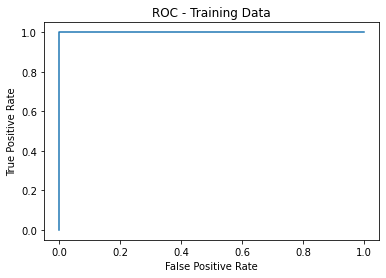

Training Data AUC: 1.0


In [238]:
#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Train set confusion matrix")
print(train_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_train, x_train_pred)
accuracy = accuracy_score(y_train, x_train_pred)

print("Training Data Accuracy: " + str(accuracy))
print("Training Data Precision: " + str(precision))
print("Training Data Recall: " + str(recall))
print("Training Data F1-score: " + str(fscore))

#ROC
probs = LR.predict_proba(train_features_set)
train_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_train, train_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Training Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_train, train_probs)
print("Training Data AUC: " + str(auc))

Test set confusion matrix
[[39  1]
 [ 1 48]]
Testing Data Accuracy: 0.9775280898876404
Testing Data Precision: [0.975      0.97959184]
Testing Data Recall: [0.975      0.97959184]
Testing Data F1-score: [0.975      0.97959184]


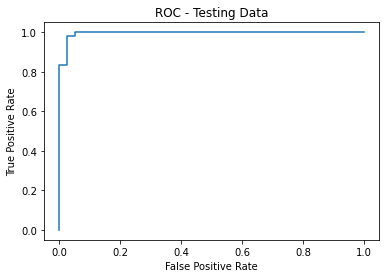

Testing Data AUC: 0.9954081632653062


In [239]:
#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = LR.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

In this case, precision should be more important, since you do not want to accidentally filter out ham comments, and it is undesirable to get rid of every spam message at the cost of possibly getting rid of more ham message

In [240]:
Beta = [0.1, 0.5, 0.9, 1, 5, 10]
for i in Beta:
    print("Beta = " + str(i) + ": F_B = " + str(fbeta_score(y_test, x_test_pred, beta=i)))

Beta = 0.1: F_B = 0.9795918367346939
Beta = 0.5: F_B = 0.979591836734694
Beta = 0.9: F_B = 0.9795918367346939
Beta = 1: F_B = 0.9795918367346939
Beta = 5: F_B = 0.9795918367346939
Beta = 10: F_B = 0.9795918367346939


# L1-penalized Logistic Regression

In [241]:
y_train = trainingset["CLASS"]
x_train = train_features_set

y_test = testingset["CLASS"]
x_test = test_features_set

log10lambda = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
lambdas = []
lambda_scores = []

for i in log10lambda:
    currlam = pow(10,i)
    KF = KFold(n_splits = 5, random_state = 42, shuffle = True)
    LR = LogisticRegression(C = 1/currlam, penalty = "l1", solver='liblinear', max_iter=4000)
    scores = cross_val_score(LR, x_train, y_train, scoring='accuracy', cv=KF)
    lambdas.append(currlam)
    lambda_scores.append(mean(scores))
    
print("The highest score is " + str(max(lambda_scores)))
location = lambda_scores.index(max(lambda_scores))
print("The best lambda to use it " + str(lambdas[location]))
lambda_star = lambdas[location]

The highest score is 0.9469483568075118
The best lambda to use it 0.01


C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Train set confusion matrix
[[163   0]
 [  0 196]]
Training Data Accuracy: 1.0
Training Data Precision: [1. 1.]
Training Data Recall: [1. 1.]
Training Data F1-score: [1. 1.]


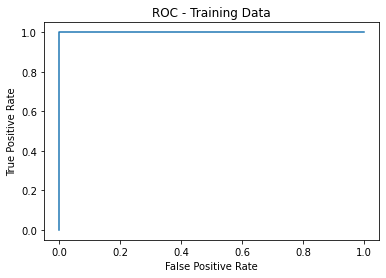

Training Data AUC: 1.0


In [242]:
testingset = pd.DataFrame()
trainingset = pd.DataFrame()

for loc in range(len(Ham)):
    if(loc < 0.8*H):
        trainingset = trainingset.append(Ham.iloc[loc])
    else:
        testingset = testingset.append(Ham.iloc[loc])        
        
for loc in range(len(Spam)):
    if(loc < 0.8*S):
        trainingset = trainingset.append(Spam.iloc[loc])
    else:
        testingset = testingset.append(Spam.iloc[loc])
        
y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values)
test_features_set = v.transform(x_test.values)

LR = LogisticRegression(C = 1/lambda_star, penalty = "l1", solver = "liblinear", max_iter=4000).fit(train_features_set, y_train)

x_train_pred = LR.predict(train_features_set)
x_test_pred = LR.predict(test_features_set)

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Train set confusion matrix")
print(train_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_train, x_train_pred)
accuracy = accuracy_score(y_train, x_train_pred)

print("Training Data Accuracy: " + str(accuracy))
print("Training Data Precision: " + str(precision))
print("Training Data Recall: " + str(recall))
print("Training Data F1-score: " + str(fscore))

#ROC
probs = LR.predict_proba(train_features_set)
train_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_train, train_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Training Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_train, train_probs)
print("Training Data AUC: " + str(auc))

Test set confusion matrix
[[40  0]
 [ 4 45]]
Testing Data Accuracy: 0.9550561797752809
Testing Data Precision: [0.90909091 1.        ]
Testing Data Recall: [1.         0.91836735]
Testing Data F1-score: [0.95238095 0.95744681]


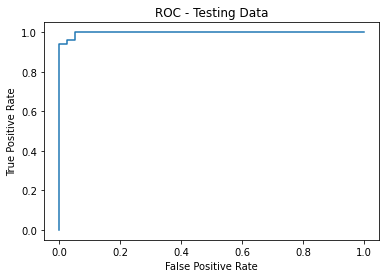

Testing Data AUC: 0.9974489795918368


In [243]:
#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = LR.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

In [244]:
Beta = [0.1, 0.5, 0.9, 1, 5, 10]
for i in Beta:
    print("Beta = " + str(i) + ": F_B = " + str(fbeta_score(y_test, x_test_pred, beta=i)))

Beta = 0.1: F_B = 0.9991206858650252
Beta = 0.5: F_B = 0.9825327510917032
Beta = 0.9: F_B = 0.9617428267800213
Beta = 1: F_B = 0.9574468085106383
Beta = 5: F_B = 0.921259842519685
Beta = 10: F_B = 0.9191102123356926


# Binary Classification Using Naiive Bayes Classifiers

In [245]:
df = pd.read_csv("Youtube04-Eminem.csv")

Ham = df[df["CLASS"] == 0]
Spam = df[df["CLASS"] == 1]

testingset = pd.DataFrame()
trainingset = pd.DataFrame()

for loc in range(len(Ham)):
    if(loc < 0.8*H):
        trainingset = trainingset.append(Ham.iloc[loc])
    else:
        testingset = testingset.append(Ham.iloc[loc])        
        
for loc in range(len(Spam)):
    if(loc < 0.8*S):
        trainingset = trainingset.append(Spam.iloc[loc])
    else:
        testingset = testingset.append(Spam.iloc[loc])
        
y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values).toarray()
test_features_set = v.transform(x_test.values).toarray()

GNB = GaussianNB().fit(train_features_set, y_train)

x_train_pred = GNB.predict(train_features_set)
x_test_pred = GNB.predict(test_features_set)

Train set confusion matrix
[[163   0]
 [  1 195]]
Training Data Accuracy: 0.9972144846796658
Training Data Precision: [0.99390244 1.        ]
Training Data Recall: [1.         0.99489796]
Training Data F1-score: [0.9969419  0.99744246]


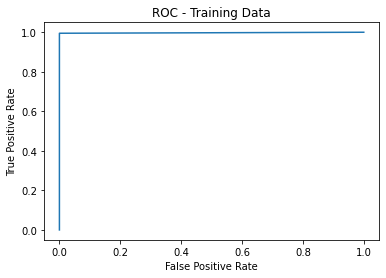

Training Data AUC: 0.9974489795918368


In [246]:
#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Train set confusion matrix")
print(train_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_train, x_train_pred)
accuracy = accuracy_score(y_train, x_train_pred)

print("Training Data Accuracy: " + str(accuracy))
print("Training Data Precision: " + str(precision))
print("Training Data Recall: " + str(recall))
print("Training Data F1-score: " + str(fscore))

#ROC
probs = GNB.predict_proba(train_features_set)
train_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_train, train_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Training Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_train, train_probs)
print("Training Data AUC: " + str(auc))

Test set confusion matrix
[[34  6]
 [ 1 48]]
Testing Data Accuracy: 0.9213483146067416
Testing Data Precision: [0.97142857 0.88888889]
Testing Data Recall: [0.85       0.97959184]
Testing Data F1-score: [0.90666667 0.93203883]


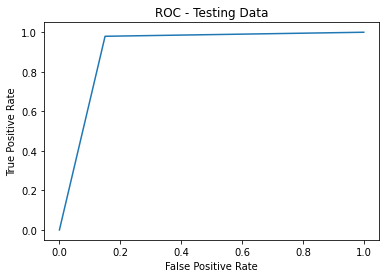

Testing Data AUC: 0.9147959183673469


In [247]:
#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = GNB.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

# Using Multinomial Priors

In [248]:
df = pd.read_csv("Youtube04-Eminem.csv")

Ham = df[df["CLASS"] == 0]
Spam = df[df["CLASS"] == 1]

testingset = pd.DataFrame()
trainingset = pd.DataFrame()

for loc in range(len(Ham)):
    if(loc < 0.8*H):
        trainingset = trainingset.append(Ham.iloc[loc])
    else:
        testingset = testingset.append(Ham.iloc[loc])        
        
for loc in range(len(Spam)):
    if(loc < 0.8*S):
        trainingset = trainingset.append(Spam.iloc[loc])
    else:
        testingset = testingset.append(Spam.iloc[loc])
        
y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values).toarray()
test_features_set = v.transform(x_test.values).toarray()

MNB = MultinomialNB(fit_prior = True).fit(train_features_set, y_train)

x_train_pred = MNB.predict(train_features_set)
x_test_pred = MNB.predict(test_features_set)

Train set confusion matrix
[[156   7]
 [  1 195]]
Training Data Accuracy: 0.9777158774373259
Training Data Precision: [0.99363057 0.96534653]
Training Data Recall: [0.95705521 0.99489796]
Training Data F1-score: [0.975     0.9798995]


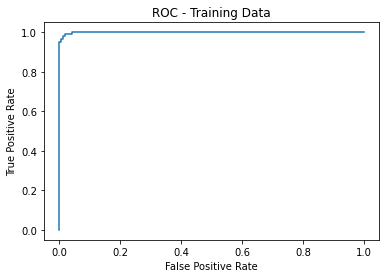

Training Data AUC: 0.9990922749467885


In [249]:
#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Train set confusion matrix")
print(train_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_train, x_train_pred)
accuracy = accuracy_score(y_train, x_train_pred)

print("Training Data Accuracy: " + str(accuracy))
print("Training Data Precision: " + str(precision))
print("Training Data Recall: " + str(recall))
print("Training Data F1-score: " + str(fscore))

#ROC
probs = MNB.predict_proba(train_features_set)
train_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_train, train_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Training Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_train, train_probs)
print("Training Data AUC: " + str(auc))

Test set confusion matrix
[[31  9]
 [ 0 49]]
Testing Data Accuracy: 0.898876404494382
Testing Data Precision: [1.         0.84482759]
Testing Data Recall: [0.775 1.   ]
Testing Data F1-score: [0.87323944 0.91588785]


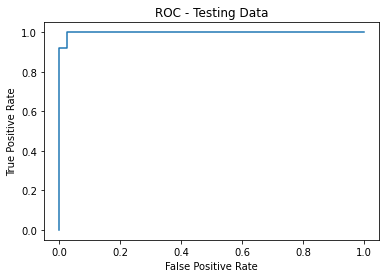

Testing Data AUC: 0.9979591836734695


In [250]:
#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = MNB.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

# Shakira Data Set

In [251]:
df = pd.read_csv("Youtube05-Shakira.csv")
Ham = df[df["CLASS"] == 0]
H = len(Ham.index)
Spam = df[df["CLASS"] == 1]
S = len(Spam.index)

testingset = pd.DataFrame()
trainingset = pd.DataFrame()
for loc in range(len(Ham)):
    if(loc < 0.8*H):
        trainingset = trainingset.append(Ham.iloc[loc])
    else:
        testingset = testingset.append(Ham.iloc[loc])        
        
for loc in range(len(Spam)):
    if(loc < 0.8*S):
        trainingset = trainingset.append(Spam.iloc[loc])
    else:
        testingset = testingset.append(Spam.iloc[loc])
        
corpus = df["CONTENT"]
cv = CountVectorizer(binary = True)
cv.fit_transform(corpus)

corpus_set = cv.transform(corpus)

train_features_set = cv.transform(trainingset["CONTENT"].values)
test_features_set = cv.transform(testingset["CONTENT"].values)

tf_transformer = TfidfTransformer(use_idf=True).fit(train_features_set)
X_train_tfidf = tf_transformer.transform(train_features_set)

The highest score is 0.9426553672316385
The best lambda to use it 0.1
Test set confusion matrix
[[36  3]
 [ 1 33]]
Testing Data Accuracy: 0.9452054794520548
Testing Data Precision: [0.97297297 0.91666667]
Testing Data Recall: [0.92307692 0.97058824]
Testing Data F1-score: [0.94736842 0.94285714]


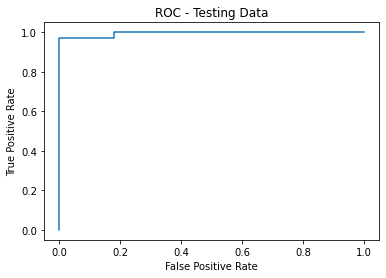

Testing Data AUC: 0.9947209653092006


In [252]:
#L2 Penalized LR
y_train = trainingset["CLASS"]
x_train = train_features_set

y_test = testingset["CLASS"]
x_test = test_features_set

log10lambda = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
lambdas = []
lambda_scores = []

for i in log10lambda:
    currlam = pow(10,i)
    KF = KFold(n_splits = 5, random_state = 42, shuffle = True)
    LR = LogisticRegression(C = 1/currlam, penalty = "l2", max_iter=4000)
    scores = cross_val_score(LR, x_train, y_train, scoring='accuracy', cv=KF)
    lambdas.append(currlam)
    lambda_scores.append(mean(scores))
    
print("The highest score is " + str(max(lambda_scores)))
location = lambda_scores.index(max(lambda_scores))
print("The best lambda to use it " + str(lambdas[location]))
lambda_star = lambdas[location]

y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values)
test_features_set = v.transform(x_test.values)

LR = LogisticRegression(C = 1/lambda_star, penalty = "l2", solver = "liblinear", max_iter=4000).fit(train_features_set, y_train)

x_train_pred = LR.predict(train_features_set)
x_test_pred = LR.predict(test_features_set)

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = LR.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

The highest score is 0.9425988700564971
The best lambda to use it 0.0001
Test set confusion matrix
[[37  2]
 [ 1 33]]
Testing Data Accuracy: 0.958904109589041
Testing Data Precision: [0.97368421 0.94285714]
Testing Data Recall: [0.94871795 0.97058824]
Testing Data F1-score: [0.96103896 0.95652174]


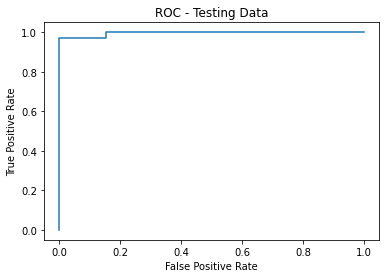

Testing Data AUC: 0.995475113122172


In [253]:
#L1 Penalized
y_train = trainingset["CLASS"]
x_train = train_features_set

y_test = testingset["CLASS"]
x_test = test_features_set

log10lambda = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
lambdas = []
lambda_scores = []

for i in log10lambda:
    currlam = pow(10,i)
    KF = KFold(n_splits = 5, random_state = 42, shuffle = True)
    LR = LogisticRegression(C = 1/currlam, penalty = "l1", solver = "liblinear", max_iter=4000)
    scores = cross_val_score(LR, x_train, y_train, scoring='accuracy', cv=KF)
    lambdas.append(currlam)
    lambda_scores.append(mean(scores))
    
print("The highest score is " + str(max(lambda_scores)))
location = lambda_scores.index(max(lambda_scores))
print("The best lambda to use it " + str(lambdas[location]))
lambda_star = lambdas[location]

y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values)
test_features_set = v.transform(x_test.values)

LR = LogisticRegression(C = 1/lambda_star, penalty = "l1", solver = "liblinear", max_iter=4000).fit(train_features_set, y_train)

x_train_pred = LR.predict(train_features_set)
x_test_pred = LR.predict(test_features_set)

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = LR.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

Test set confusion matrix
[[32  7]
 [ 0 34]]
Testing Data Accuracy: 0.9041095890410958
Testing Data Precision: [1.         0.82926829]
Testing Data Recall: [0.82051282 1.        ]
Testing Data F1-score: [0.90140845 0.90666667]


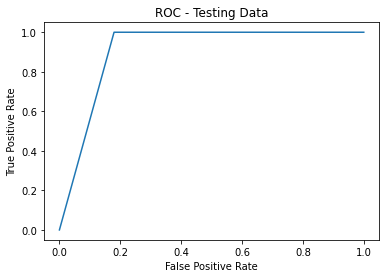

Testing Data AUC: 0.9102564102564102


In [254]:
#NB-Gaussian
y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values).toarray()
test_features_set = v.transform(x_test.values).toarray()

GNB = GaussianNB().fit(train_features_set, y_train)

x_train_pred = GNB.predict(train_features_set)
x_test_pred = GNB.predict(test_features_set)

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = GNB.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

Test set confusion matrix
[[36  3]
 [ 1 33]]
Testing Data Accuracy: 0.9452054794520548
Testing Data Precision: [0.97297297 0.91666667]
Testing Data Recall: [0.92307692 0.97058824]
Testing Data F1-score: [0.94736842 0.94285714]


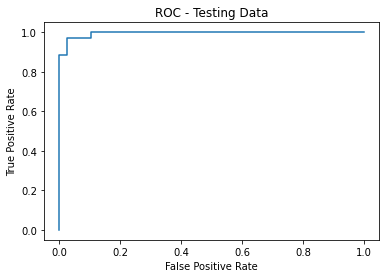

Testing Data AUC: 0.9947209653092006


In [256]:
#NB-Multinomial
y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values).toarray()
test_features_set = v.transform(x_test.values).toarray()

MNB = MultinomialNB(fit_prior = True).fit(train_features_set, y_train)

x_train_pred = MNB.predict(train_features_set)
x_test_pred = MNB.predict(test_features_set)

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = MNB.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

# LMFAO Dataset

In [257]:
df = pd.read_csv("Youtube03-LMFAO.csv")
Ham = df[df["CLASS"] == 0]
H = len(Ham.index)
Spam = df[df["CLASS"] == 1]
S = len(Spam.index)

testingset = pd.DataFrame()
trainingset = pd.DataFrame()
for loc in range(len(Ham)):
    if(loc < 0.8*H):
        trainingset = trainingset.append(Ham.iloc[loc])
    else:
        testingset = testingset.append(Ham.iloc[loc])        
        
for loc in range(len(Spam)):
    if(loc < 0.8*S):
        trainingset = trainingset.append(Spam.iloc[loc])
    else:
        testingset = testingset.append(Spam.iloc[loc])
        
corpus = df["CONTENT"]
cv = CountVectorizer(binary = True)
cv.fit_transform(corpus)

corpus_set = cv.transform(corpus)

train_features_set = cv.transform(trainingset["CONTENT"].values)
test_features_set = cv.transform(testingset["CONTENT"].values)

tf_transformer = TfidfTransformer(use_idf=True).fit(train_features_set)
X_train_tfidf = tf_transformer.transform(train_features_set)

The highest score is 0.9573038229376257
The best lambda to use it 1e-05
Test set confusion matrix
[[38  2]
 [ 5 42]]
Testing Data Accuracy: 0.9195402298850575
Testing Data Precision: [0.88372093 0.95454545]
Testing Data Recall: [0.95       0.89361702]
Testing Data F1-score: [0.91566265 0.92307692]


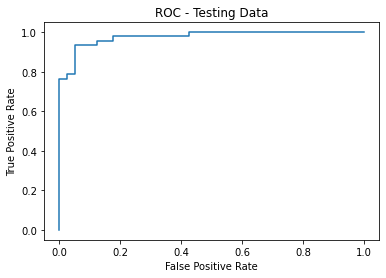

Testing Data AUC: 0.9765957446808511


In [258]:
#L2 Penalized LR
y_train = trainingset["CLASS"]
x_train = train_features_set

y_test = testingset["CLASS"]
x_test = test_features_set

log10lambda = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
lambdas = []
lambda_scores = []

for i in log10lambda:
    currlam = pow(10,i)
    KF = KFold(n_splits = 5, random_state = 42, shuffle = True)
    LR = LogisticRegression(C = 1/currlam, penalty = "l2", max_iter=4000)
    scores = cross_val_score(LR, x_train, y_train, scoring='accuracy', cv=KF)
    lambdas.append(currlam)
    lambda_scores.append(mean(scores))
    
print("The highest score is " + str(max(lambda_scores)))
location = lambda_scores.index(max(lambda_scores))
print("The best lambda to use it " + str(lambdas[location]))
lambda_star = lambdas[location]

y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values)
test_features_set = v.transform(x_test.values)

LR = LogisticRegression(C = 1/lambda_star, penalty = "l2", solver = "liblinear", max_iter=4000).fit(train_features_set, y_train)

x_train_pred = LR.predict(train_features_set)
x_test_pred = LR.predict(test_features_set)

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = LR.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

The highest score is 0.9344466800804829
The best lambda to use it 0.0001
Test set confusion matrix
[[39  1]
 [ 5 42]]
Testing Data Accuracy: 0.9310344827586207
Testing Data Precision: [0.88636364 0.97674419]
Testing Data Recall: [0.975      0.89361702]
Testing Data F1-score: [0.92857143 0.93333333]


C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


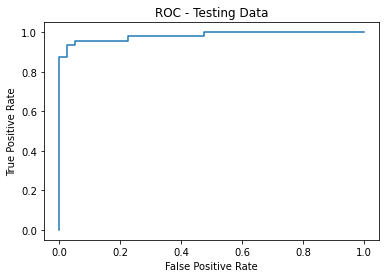

Testing Data AUC: 0.9824468085106383


In [259]:
#L1 Penalized
y_train = trainingset["CLASS"]
x_train = train_features_set

y_test = testingset["CLASS"]
x_test = test_features_set

log10lambda = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
lambdas = []
lambda_scores = []

for i in log10lambda:
    currlam = pow(10,i)
    KF = KFold(n_splits = 5, random_state = 42, shuffle = True)
    LR = LogisticRegression(C = 1/currlam, penalty = "l1", solver = "liblinear", max_iter=4000)
    scores = cross_val_score(LR, x_train, y_train, scoring='accuracy', cv=KF)
    lambdas.append(currlam)
    lambda_scores.append(mean(scores))
    
print("The highest score is " + str(max(lambda_scores)))
location = lambda_scores.index(max(lambda_scores))
print("The best lambda to use it " + str(lambdas[location]))
lambda_star = lambdas[location]

y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values)
test_features_set = v.transform(x_test.values)

LR = LogisticRegression(C = 1/lambda_star, penalty = "l1", solver = "liblinear", max_iter=4000).fit(train_features_set, y_train)

x_train_pred = LR.predict(train_features_set)
x_test_pred = LR.predict(test_features_set)

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = LR.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

Test set confusion matrix
[[38  2]
 [ 7 40]]
Testing Data Accuracy: 0.896551724137931
Testing Data Precision: [0.84444444 0.95238095]
Testing Data Recall: [0.95       0.85106383]
Testing Data F1-score: [0.89411765 0.8988764 ]


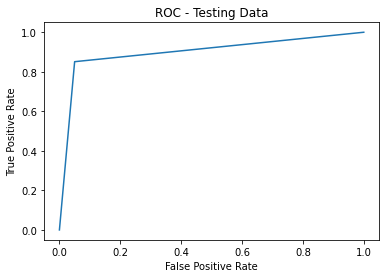

Testing Data AUC: 0.900531914893617


In [260]:
#NB-Gaussian
y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values).toarray()
test_features_set = v.transform(x_test.values).toarray()

GNB = GaussianNB().fit(train_features_set, y_train)

x_train_pred = GNB.predict(train_features_set)
x_test_pred = GNB.predict(test_features_set)

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = GNB.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

Test set confusion matrix
[[32  8]
 [ 3 44]]
Testing Data Accuracy: 0.8735632183908046
Testing Data Precision: [0.91428571 0.84615385]
Testing Data Recall: [0.8        0.93617021]
Testing Data F1-score: [0.85333333 0.88888889]


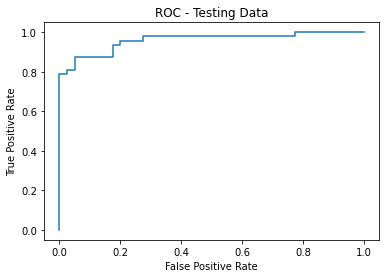

Testing Data AUC: 0.9585106382978724


In [261]:
#NB-Multinomial
y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values).toarray()
test_features_set = v.transform(x_test.values).toarray()

MNB = MultinomialNB(fit_prior = True).fit(train_features_set, y_train)

x_train_pred = MNB.predict(train_features_set)
x_test_pred = MNB.predict(test_features_set)

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = MNB.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

# Katy Perry Data set

In [262]:
df = pd.read_csv("Youtube02-KatyPerry.csv")
Ham = df[df["CLASS"] == 0]
H = len(Ham.index)
Spam = df[df["CLASS"] == 1]
S = len(Spam.index)

testingset = pd.DataFrame()
trainingset = pd.DataFrame()
for loc in range(len(Ham)):
    if(loc < 0.8*H):
        trainingset = trainingset.append(Ham.iloc[loc])
    else:
        testingset = testingset.append(Ham.iloc[loc])        
        
for loc in range(len(Spam)):
    if(loc < 0.8*S):
        trainingset = trainingset.append(Spam.iloc[loc])
    else:
        testingset = testingset.append(Spam.iloc[loc])
        
corpus = df["CONTENT"]
cv = CountVectorizer(binary = True)
cv.fit_transform(corpus)

corpus_set = cv.transform(corpus)

train_features_set = cv.transform(trainingset["CONTENT"].values)
test_features_set = cv.transform(testingset["CONTENT"].values)

tf_transformer = TfidfTransformer(use_idf=True).fit(train_features_set)
X_train_tfidf = tf_transformer.transform(train_features_set)

The highest score is 0.9535714285714285
The best lambda to use it 1e-05
Test set confusion matrix
[[33  2]
 [ 3 32]]
Testing Data Accuracy: 0.9285714285714286
Testing Data Precision: [0.91666667 0.94117647]
Testing Data Recall: [0.94285714 0.91428571]
Testing Data F1-score: [0.92957746 0.92753623]


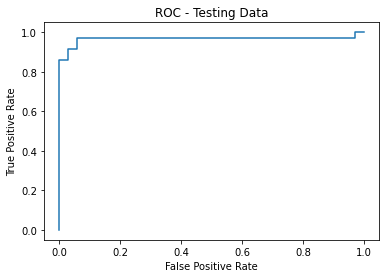

Testing Data AUC: 0.9673469387755101


In [263]:
#L2 Penalized LR
y_train = trainingset["CLASS"]
x_train = train_features_set

y_test = testingset["CLASS"]
x_test = test_features_set

log10lambda = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
lambdas = []
lambda_scores = []

for i in log10lambda:
    currlam = pow(10,i)
    KF = KFold(n_splits = 5, random_state = 42, shuffle = True)
    LR = LogisticRegression(C = 1/currlam, penalty = "l2", max_iter=4000)
    scores = cross_val_score(LR, x_train, y_train, scoring='accuracy', cv=KF)
    lambdas.append(currlam)
    lambda_scores.append(mean(scores))
    
print("The highest score is " + str(max(lambda_scores)))
location = lambda_scores.index(max(lambda_scores))
print("The best lambda to use it " + str(lambdas[location]))
lambda_star = lambdas[location]

y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values)
test_features_set = v.transform(x_test.values)

LR = LogisticRegression(C = 1/lambda_star, penalty = "l2", solver = "liblinear", max_iter=4000).fit(train_features_set, y_train)

x_train_pred = LR.predict(train_features_set)
x_test_pred = LR.predict(test_features_set)

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = LR.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

The highest score is 0.9535714285714285
The best lambda to use it 0.0001
Test set confusion matrix
[[34  1]
 [ 1 34]]
Testing Data Accuracy: 0.9714285714285714
Testing Data Precision: [0.97142857 0.97142857]
Testing Data Recall: [0.97142857 0.97142857]
Testing Data F1-score: [0.97142857 0.97142857]


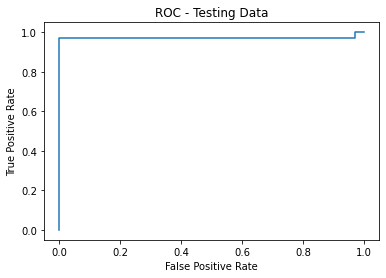

Testing Data AUC: 0.9722448979591837


In [264]:
#L1 Penalized
y_train = trainingset["CLASS"]
x_train = train_features_set

y_test = testingset["CLASS"]
x_test = test_features_set

log10lambda = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
lambdas = []
lambda_scores = []

for i in log10lambda:
    currlam = pow(10,i)
    KF = KFold(n_splits = 5, random_state = 42, shuffle = True)
    LR = LogisticRegression(C = 1/currlam, penalty = "l1", solver = "liblinear", max_iter=4000)
    scores = cross_val_score(LR, x_train, y_train, scoring='accuracy', cv=KF)
    lambdas.append(currlam)
    lambda_scores.append(mean(scores))
    
print("The highest score is " + str(max(lambda_scores)))
location = lambda_scores.index(max(lambda_scores))
print("The best lambda to use it " + str(lambdas[location]))
lambda_star = lambdas[location]

y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values)
test_features_set = v.transform(x_test.values)

LR = LogisticRegression(C = 1/lambda_star, penalty = "l1", solver = "liblinear", max_iter=4000).fit(train_features_set, y_train)

x_train_pred = LR.predict(train_features_set)
x_test_pred = LR.predict(test_features_set)

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = LR.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

Test set confusion matrix
[[28  7]
 [ 3 32]]
Testing Data Accuracy: 0.8571428571428571
Testing Data Precision: [0.90322581 0.82051282]
Testing Data Recall: [0.8        0.91428571]
Testing Data F1-score: [0.84848485 0.86486486]


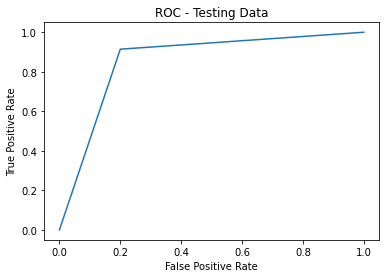

Testing Data AUC: 0.8571428571428571


In [265]:
#NB-Gaussian
y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values).toarray()
test_features_set = v.transform(x_test.values).toarray()

GNB = GaussianNB().fit(train_features_set, y_train)

x_train_pred = GNB.predict(train_features_set)
x_test_pred = GNB.predict(test_features_set)

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = GNB.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

Test set confusion matrix
[[33  2]
 [ 4 31]]
Testing Data Accuracy: 0.9142857142857143
Testing Data Precision: [0.89189189 0.93939394]
Testing Data Recall: [0.94285714 0.88571429]
Testing Data F1-score: [0.91666667 0.91176471]


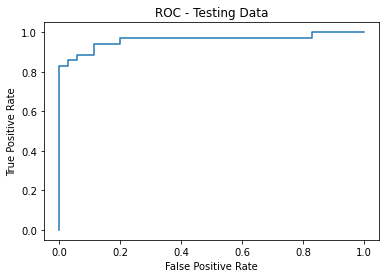

Testing Data AUC: 0.9616326530612244


In [266]:
#NB-Multinomial
y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values).toarray()
test_features_set = v.transform(x_test.values).toarray()

MNB = MultinomialNB(fit_prior = True).fit(train_features_set, y_train)

x_train_pred = MNB.predict(train_features_set)
x_test_pred = MNB.predict(test_features_set)

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = MNB.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

# PSY Dataset

In [267]:
df = pd.read_csv("Youtube01-Psy.csv")
Ham = df[df["CLASS"] == 0]
H = len(Ham.index)
Spam = df[df["CLASS"] == 1]
S = len(Spam.index)

testingset = pd.DataFrame()
trainingset = pd.DataFrame()
for loc in range(len(Ham)):
    if(loc < 0.8*H):
        trainingset = trainingset.append(Ham.iloc[loc])
    else:
        testingset = testingset.append(Ham.iloc[loc])        
        
for loc in range(len(Spam)):
    if(loc < 0.8*S):
        trainingset = trainingset.append(Spam.iloc[loc])
    else:
        testingset = testingset.append(Spam.iloc[loc])
        
corpus = df["CONTENT"]
cv = CountVectorizer(binary = True)
cv.fit_transform(corpus)

corpus_set = cv.transform(corpus)

train_features_set = cv.transform(trainingset["CONTENT"].values)
test_features_set = cv.transform(testingset["CONTENT"].values)

tf_transformer = TfidfTransformer(use_idf=True).fit(train_features_set)
X_train_tfidf = tf_transformer.transform(train_features_set)

The highest score is 0.9642857142857142
The best lambda to use it 10
Test set confusion matrix
[[34  1]
 [ 1 34]]
Testing Data Accuracy: 0.9714285714285714
Testing Data Precision: [0.97142857 0.97142857]
Testing Data Recall: [0.97142857 0.97142857]
Testing Data F1-score: [0.97142857 0.97142857]


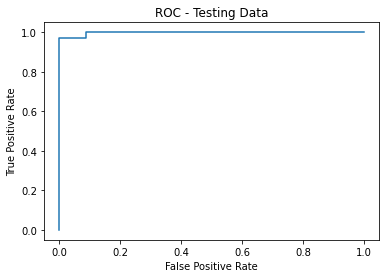

Testing Data AUC: 0.9975510204081632


In [268]:
#L2 Penalized LR
y_train = trainingset["CLASS"]
x_train = train_features_set

y_test = testingset["CLASS"]
x_test = test_features_set

log10lambda = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
lambdas = []
lambda_scores = []

for i in log10lambda:
    currlam = pow(10,i)
    KF = KFold(n_splits = 5, random_state = 42, shuffle = True)
    LR = LogisticRegression(C = 1/currlam, penalty = "l2", max_iter=4000)
    scores = cross_val_score(LR, x_train, y_train, scoring='accuracy', cv=KF)
    lambdas.append(currlam)
    lambda_scores.append(mean(scores))
    
print("The highest score is " + str(max(lambda_scores)))
location = lambda_scores.index(max(lambda_scores))
print("The best lambda to use it " + str(lambdas[location]))
lambda_star = lambdas[location]

y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values)
test_features_set = v.transform(x_test.values)

LR = LogisticRegression(C = 1/lambda_star, penalty = "l2", solver = "liblinear", max_iter=4000).fit(train_features_set, y_train)

x_train_pred = LR.predict(train_features_set)
x_test_pred = LR.predict(test_features_set)

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = LR.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

The highest score is 0.9428571428571428
The best lambda to use it 0.0001
Test set confusion matrix
[[34  1]
 [ 1 34]]
Testing Data Accuracy: 0.9714285714285714
Testing Data Precision: [0.97142857 0.97142857]
Testing Data Recall: [0.97142857 0.97142857]
Testing Data F1-score: [0.97142857 0.97142857]


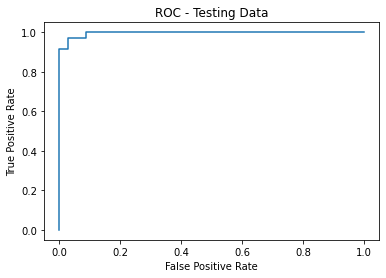

Testing Data AUC: 0.9959183673469387


In [269]:
#L1 Penalized
y_train = trainingset["CLASS"]
x_train = train_features_set

y_test = testingset["CLASS"]
x_test = test_features_set

log10lambda = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
lambdas = []
lambda_scores = []

for i in log10lambda:
    currlam = pow(10,i)
    KF = KFold(n_splits = 5, random_state = 42, shuffle = True)
    LR = LogisticRegression(C = 1/currlam, penalty = "l1", solver = "liblinear", max_iter=4000)
    scores = cross_val_score(LR, x_train, y_train, scoring='accuracy', cv=KF)
    lambdas.append(currlam)
    lambda_scores.append(mean(scores))
    
print("The highest score is " + str(max(lambda_scores)))
location = lambda_scores.index(max(lambda_scores))
print("The best lambda to use it " + str(lambdas[location]))
lambda_star = lambdas[location]

y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values)
test_features_set = v.transform(x_test.values)

LR = LogisticRegression(C = 1/lambda_star, penalty = "l1", solver = "liblinear", max_iter=4000).fit(train_features_set, y_train)

x_train_pred = LR.predict(train_features_set)
x_test_pred = LR.predict(test_features_set)

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = LR.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

Test set confusion matrix
[[30  5]
 [ 4 31]]
Testing Data Accuracy: 0.8714285714285714
Testing Data Precision: [0.88235294 0.86111111]
Testing Data Recall: [0.85714286 0.88571429]
Testing Data F1-score: [0.86956522 0.87323944]


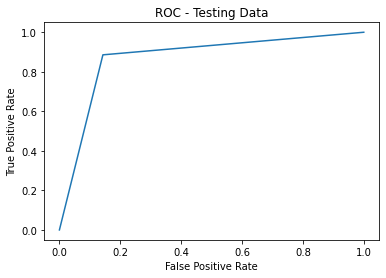

Testing Data AUC: 0.8714285714285714


In [270]:
#NB-Gaussian
y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values).toarray()
test_features_set = v.transform(x_test.values).toarray()

GNB = GaussianNB().fit(train_features_set, y_train)

x_train_pred = GNB.predict(train_features_set)
x_test_pred = GNB.predict(test_features_set)

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = GNB.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

Test set confusion matrix
[[33  2]
 [ 1 34]]
Testing Data Accuracy: 0.9571428571428572
Testing Data Precision: [0.97058824 0.94444444]
Testing Data Recall: [0.94285714 0.97142857]
Testing Data F1-score: [0.95652174 0.95774648]


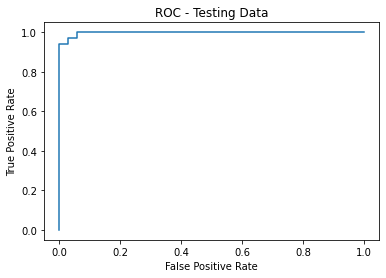

Testing Data AUC: 0.9975510204081632


In [271]:
#NB-Multinomial
y_train = trainingset["CLASS"]
x_train = trainingset["CONTENT"]

y_test = testingset["CLASS"]
x_test = testingset["CONTENT"]

x_train_list = x_train.tolist()
v = TfidfVectorizer(input = x_train_list)

train_features_set = v.fit_transform(x_train.values).toarray()
test_features_set = v.transform(x_test.values).toarray()

MNB = MultinomialNB(fit_prior = True).fit(train_features_set, y_train)

x_train_pred = MNB.predict(train_features_set)
x_test_pred = MNB.predict(test_features_set)

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Test set confusion matrix")
print(test_confusion_matrix)

#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
accuracy = accuracy_score(y_test, x_test_pred)

print("Testing Data Accuracy: " + str(accuracy))
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#ROC
probs = MNB.predict_proba(test_features_set)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#AUC
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))